# Machine Learning Project: MEMS Parametric Optimization Study

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Import the collected data 
datafile = 'data.csv'
data = pd.read_csv(datafile, header=None, names=['Electrode Width - Top', 'Vrms1', 
                                                    'Electrode Width - Bottom', 'Vrms2',
                                                    'Electrode Length', 'Vrms3',
                                                    'Shuttle Mass', 'Vrms4',
                                                    'Device Thickness', 'Vrms5',
                                                    'Initial Electrode Gap', 'Vrms6',
                                                    'Parylene-C Layer Thickness', 'Vrms7',
                                                    'G-force Applied', 'Vrms8',])

display(data)

,Electrode Width - Top,Vrms1,Electrode Width - Bottom,Vrms2,Electrode Length,Vrms3,Shuttle Mass,Vrms4,Device Thickness,Vrms5,Initial Electrode Gap,Vrms6,Parylene-C Layer Thickness,Vrms7,G-force Applied,Vrms8
0,0.000011,0.000017,0.000018,2.560630e-08,0.000405,0.000262,0.000001,0.000016,0.000043,0.000025,0.000014,0.000272,1.922000e-07,0.000183,0.3660,0.000005
1,0.000010,0.000092,0.000025,2.828980e-06,0.000454,0.000013,0.000001,0.000021,0.000045,0.000023,0.000017,0.000436,1.214000e-07,0.000246,1.2732,0.000399
2,0.000013,0.000006,0.000024,2.094610e-06,0.000322,0.000599,0.000001,0.000016,0.000031,0.000058,0.000015,0.000235,1.082000e-07,0.000263,0.8420,0.000057
3,0.000011,0.000017,0.000019,9.661580e-08,0.000462,0.000011,0.000001,0.000026,0.000037,0.000032,0.000012,0.000292,1.078000e-07,0.000264,0.9092,0.000150
4,0.000009,0.000179,0.000018,4.376620e-08,0.000270,0.000883,0.000001,0.000016,0.000035,0.000038,0.000015,0.000232,1.786000e-07,0.000192,0.4164,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000011,0.000017,0.000022,5.121680e-07,0.000351,0.000499,0.000002,0.000049,0.000042,0.000026,0.000018,0.000004,1.122000e-07,0.000258,1.1108,0.000332
246,0.000013,0.000006,0.000024,2.561210e-06,0.000276,0.000845,0.000001,0.000020,0.000041,0.000028,0.000015,0.000259,1.706000e-07,0.000198,1.1332,0.000357
247,0.000012,0.000014,0.000023,9.355510e-07,0.000329,0.000584,0.000002,0.000253,0.000041,0.000027,0.000013,0.000274,1.482000e-07,0.000217,0.7804,0.000037
248,0.000010,0.000038,0.000027,9.077740e-06,0.000287,0.000807,0.000002,0.000064,0.000049,0.000021,0.000017,0.000012,1.098000e-07,0.000261,0.6292,0.000018


Electrode Width (top):          Vrms1
Electrode Width (bottom):       Vrms2
Electrode Length:               Vrms3
Initial Electrode Gap:          Vrms6


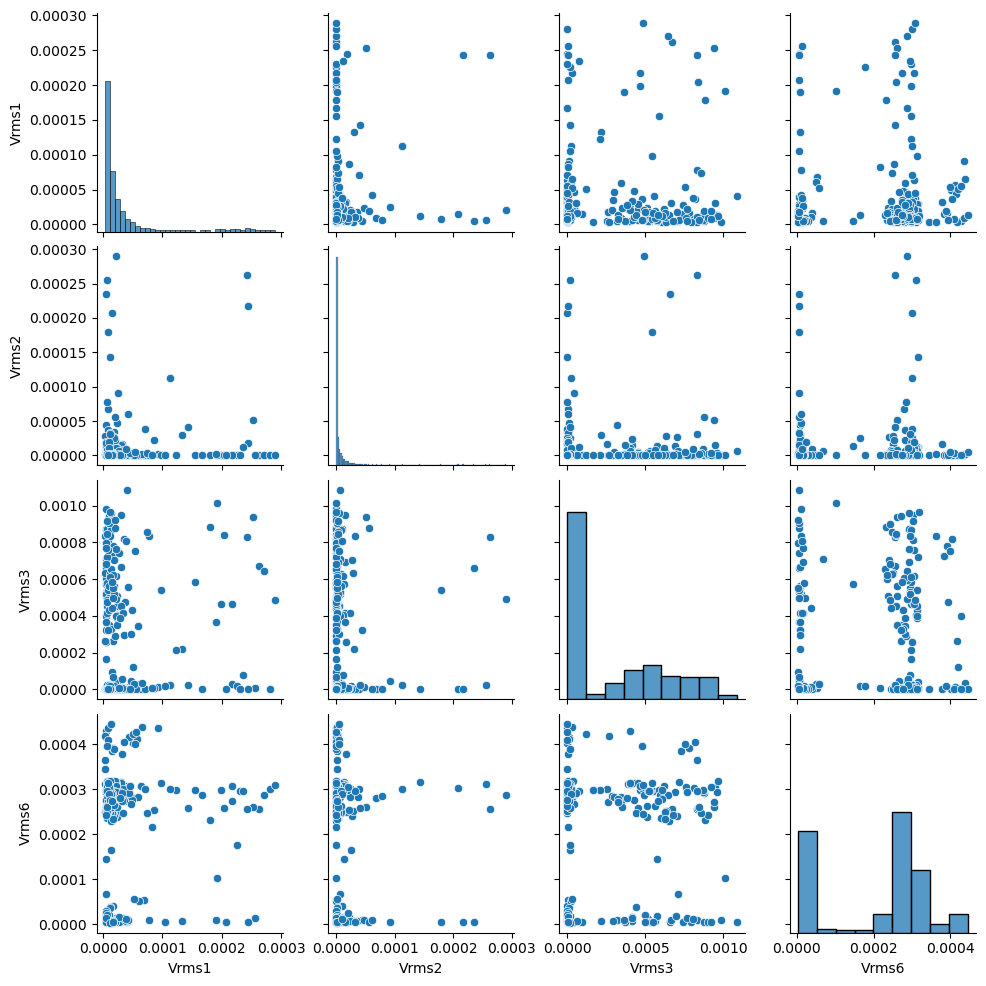

In [2]:
data_visualization1 = data[['Vrms1','Vrms2','Vrms3','Vrms6']]
print('Electrode Width (top):          Vrms1')
print('Electrode Width (bottom):       Vrms2')
print('Electrode Length:               Vrms3')
print('Initial Electrode Gap:          Vrms6')
sns.pairplot(data_visualization1)

Shuttle Mass:                      Vrms4
Device Thickness:                  Vrms5
Parylene-C Layer Thickness:        Vrms7
G-force Applied:                   Vrms8


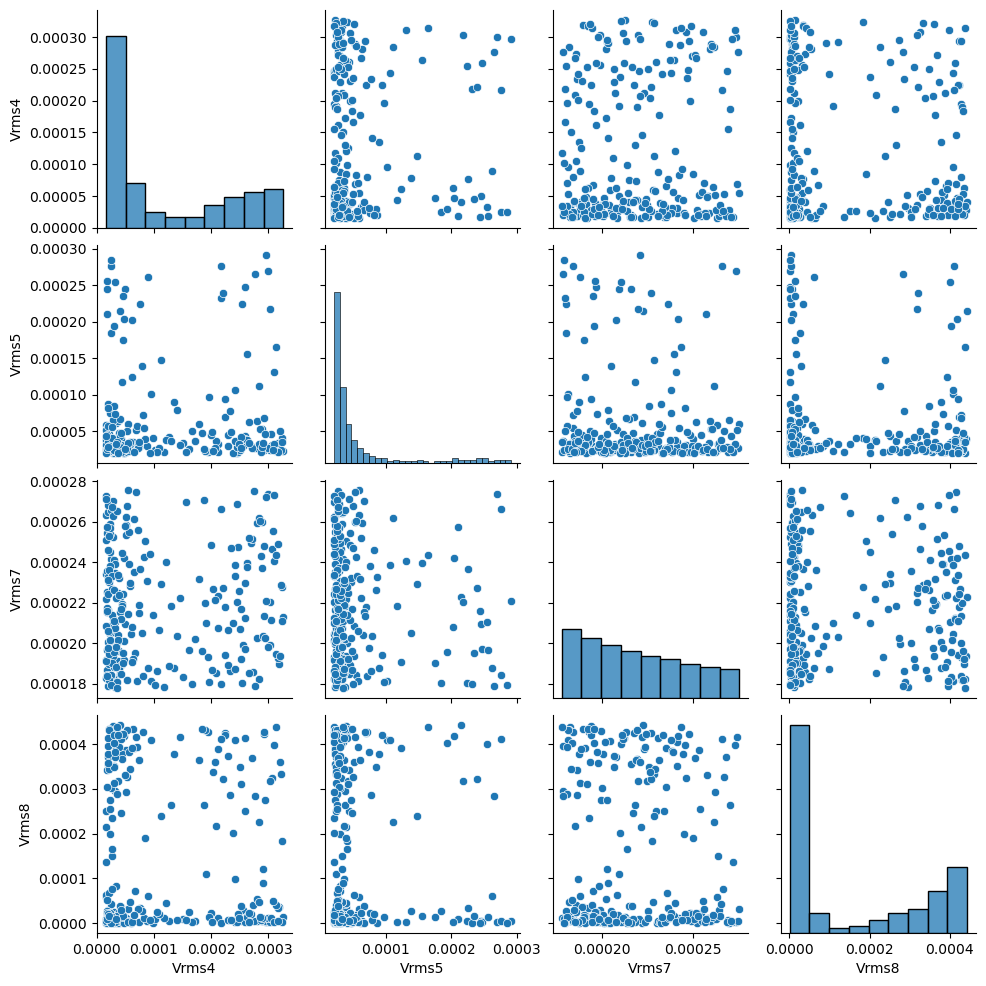

In [3]:
data_visualization2 = data[['Vrms4','Vrms5','Vrms7','Vrms8']]
print('Shuttle Mass:                      Vrms4')
print('Device Thickness:                  Vrms5')
print('Parylene-C Layer Thickness:        Vrms7')
print('G-force Applied:                   Vrms8')
sns.pairplot(data_visualization2)

# Classification

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.91


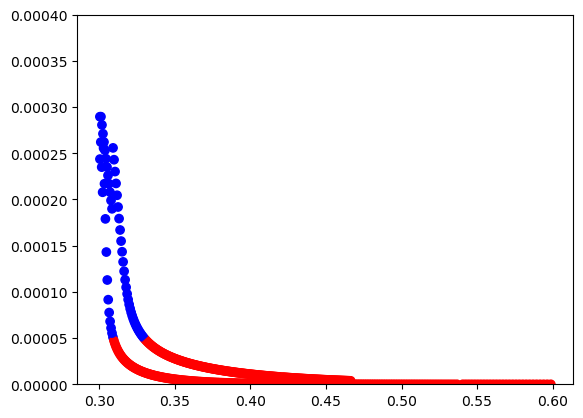

In [4]:
# Nominal parameter values
electrode_top = 0.000009
electrode_bottom = 0.00003
electrode_length = 0.0004
electrode_gap = 0.000014
electrode_g = 1
electrode_mass = 0.000002

# Sample dataset
width_data = data[['Electrode Width - Top','Electrode Width - Bottom']]
Vrms_data = data[['Vrms1','Vrms2']]
width_data = pd.DataFrame.to_numpy(width_data)
Vrms_data = pd.DataFrame.to_numpy(Vrms_data)
Vrms = []
X = []
y = []

# Set the X and y data
for i in range(249):
    X.append(width_data[i,0]/electrode_bottom)
    Vrms.append(Vrms_data[i,0])
    if Vrms_data[i,0] > 0.5e-4:
        y.append(1)
    else:
        y.append(0)
for i in range(249):
    X.append(electrode_top/width_data[i,1])
    Vrms.append(Vrms_data[i,1])
    if Vrms_data[i,1] > 0.5e-4:
        y.append(1)
    else:
        y.append(0)

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
Vrms = np.array(Vrms).reshape(-1, 1)
# print(X)
# print(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the test data using the trained model
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Visualize the data points
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:,:], Vrms[:,:], color=colors)
plt.ylim(0, 0.0004)
plt.show()

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.98


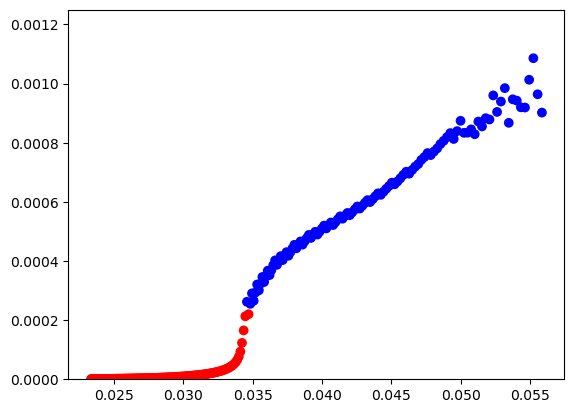

In [5]:
# Sample dataset
length_data = data[['Electrode Length','Initial Electrode Gap']]
Vrms_data2 = data[['Vrms3','Vrms6']]
length_data = pd.DataFrame.to_numpy(length_data)
Vrms_data2 = pd.DataFrame.to_numpy(Vrms_data2)
Vrms2 = []
X2 = []
y2 = []

# Set the X and y data
for i in range(249):
    X2.append(electrode_gap/length_data[i,0])
    Vrms2.append(Vrms_data2[i,0])
    if Vrms_data2[i,0] > 0.00025:
        y2.append(1)
    else:
        y2.append(0)

X2 = np.array(X2).reshape(-1, 1)
y2 = np.array(y2).reshape(-1, 1)
Vrms2 = np.array(Vrms2).reshape(-1, 1)

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train2, y_train2)

# Predict the test data using the trained model
y_pred2 = knn.predict(X_test2)

# Calculate the accuracy of the model
accuracy2 = accuracy_score(y_test2, y_pred2)

print("Accuracy:", accuracy2)

# Visualize the data points
colors = ['red' if label == 0 else 'blue' for label in y2]
plt.scatter(X2[:,:], Vrms2[:,:], color=colors)
plt.ylim(0, 0.00125)
plt.show()

C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 1.0


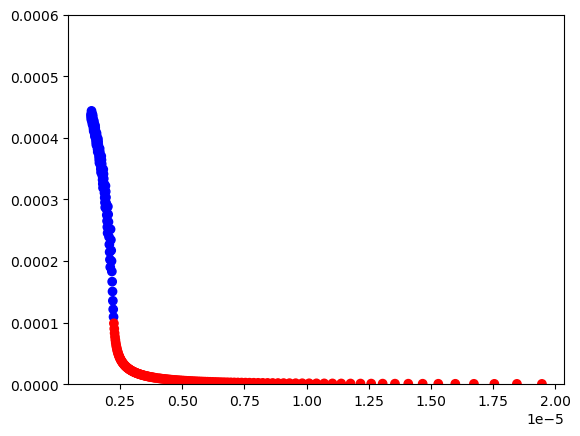

In [6]:
# Sample dataset
mass_data = data[['Shuttle Mass','G-force Applied']]
Vrms_data3 = data[['Vrms4','Vrms8']]
mass_data = pd.DataFrame.to_numpy(mass_data)
Vrms_data3 = pd.DataFrame.to_numpy(Vrms_data3)
Vrms3 = []
X3 = []
y3 = []

# Set the X and y data

for i in range(249):
    X3.append(electrode_mass/mass_data[i,1])
    Vrms3.append(Vrms_data3[i,1])
    if Vrms_data3[i,1] > 0.0001:
        y3.append(1)
    else:
        y3.append(0)

X3 = np.array(X3).reshape(-1, 1)
y3 = np.array(y3).reshape(-1, 1)
Vrms3 = np.array(Vrms3).reshape(-1, 1)

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train3, y_train3)

# Predict the test data using the trained model
y_pred3 = knn.predict(X_test3)

# Calculate the accuracy of the model
accuracy3 = accuracy_score(y_test3, y_pred3)

print("Accuracy:", accuracy3)

# Visualize the data points
colors = ['red' if label == 0 else 'blue' for label in y3]
plt.scatter(X3[:,:], Vrms3[:,:], color=colors)
plt.ylim(0, 0.0006)
plt.show()

# Neural Network

In [13]:
X = data[['Electrode Width - Top','Electrode Width - Bottom','Electrode Length','Shuttle Mass',
          'Device Thickness','Parylene-C Layer Thickness','G-force Applied']]
y = data[['Vrms1','Vrms2','Vrms3','Vrms4','Vrms5','Vrms7','Vrms8']]

X = pd.DataFrame.to_numpy(X)
y = pd.DataFrame.to_numpy(y)
# X = X[1:,:]
# y = y[1:,:]

assert not np.any(np.isnan(X))
assert not np.any(np.isnan(y))

print(X.shape)
print(y.shape)

(250, 7)
(250, 7)


In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 123)

# print(X_train)
# print(y_train)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_val shape:   ',X_test.shape)
print('y_val shape:   ',y_test.shape)

X_train shape:  (187, 7)
y_train shape:  (187, 7)
X_val shape:    (63, 7)
y_val shape:    (63, 7)


In [15]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Dense(4, activation='relu', input_shape=(7,)),
 tf.keras.layers.Dense(2, activation='relu'),
 tf.keras.layers.Dense(1)])

model.summary()
opt = optimizers.Adam(learning_rate=0.01)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 128, epochs=150)

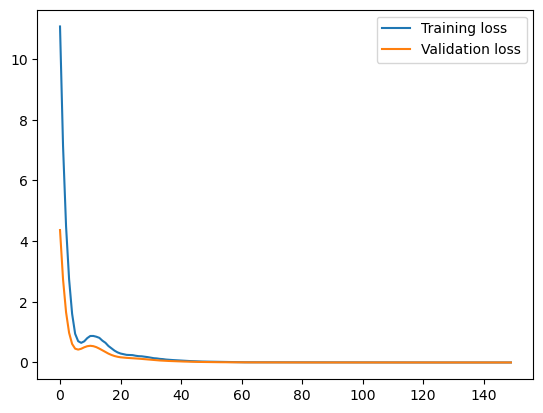

In [20]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# lr = LogisticRegression(solver='lbfgs', max_iter=10000)
# lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
# y_pred = lr.predict(X_test.reshape(-1, 1))

# R-squared value
print('R-squared value: ', r2_score(y_test, y_pred))

# Mean squared error
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred, squared=False))

# Root mean squared error
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

# Mean absolute error
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

R-squared value:  0.6743461559048454
Mean Squared Error:  5.620128427962825e-05
Root Mean Squared Error:  0.007496751581827175
Mean Absolute Error:  4.4234638334231194e-05
